# Diabetes Prediction: Machine Learning Model

This notebook demonstrates how to build a machine learning model to predict diabetes using the `diabetes.csv` dataset. Each step is thoroughly documented, including data loading, preprocessing, model training, evaluation, and an explanation of the chosen algorithm.

## 1. Import Required Libraries

We begin by importing essential libraries for data handling, visualization, and machine learning.

In [27]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## 2. Load and Explore Dataset

Let's load the `diabetes.csv` dataset and perform basic exploratory data analysis to understand its structure and contents.

In [28]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Dataset information
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 3. Preprocess Data

We will clean the data, handle missing values, and scale features if necessary to prepare the dataset for modeling.

In [30]:
# Replace zero values in certain columns with NaN (if appropriate)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill missing values with column median
df.fillna(df.median(), inplace=True)

# Feature scaling (optional, for some models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_scaled = scaler.fit_transform(X)

## 4. Split Data into Training and Test Sets

We will split the dataset into training and testing subsets to evaluate model performance on unseen data.

In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_train.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

Training samples: 614
Test samples: 154


## 5. Select and Train Machine Learning Model

We will use Logistic Regression, a widely used algorithm for binary classification problems like diabetes prediction.

In [32]:
# Instantiate and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

## 6. Evaluate Model Performance

We will assess the model using accuracy, precision, recall, F1-score, and a confusion matrix.

Accuracy: 0.75
Precision: 0.67
Recall: 0.62
F1-score: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



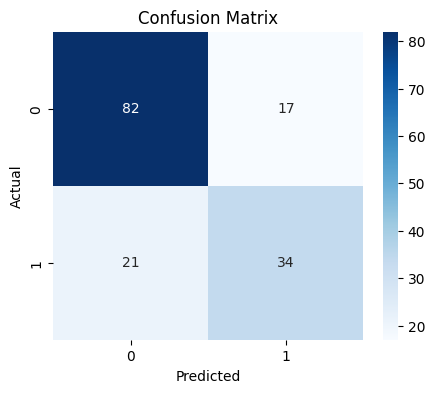

In [33]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {acc:.2f}')
print(f'Precision: {prec:.2f}')
print(f'Recall: {rec:.2f}')
print(f'F1-score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 7. Document Model Training Algorithm

### Logistic Regression

**Working Principle:**
Logistic Regression is a supervised learning algorithm used for binary classification tasks. It models the probability that a given input belongs to a particular class using the logistic (sigmoid) function. The output is a probability value between 0 and 1, which is then thresholded to assign a class label.

**Key Hyperparameters:**
- `C`: Inverse of regularization strength. Smaller values specify stronger regularization.
- `max_iter`: Maximum number of iterations for the solver to converge.
- `solver`: Algorithm to use in the optimization problem (e.g., 'lbfgs', 'liblinear').

**Why Logistic Regression?**
- It is simple, interpretable, and effective for binary classification problems like diabetes prediction.
- Provides probability estimates for predictions.
- Works well with scaled, clean datasets.

For more complex relationships, other algorithms (e.g., Random Forest, SVM) can be explored, but Logistic Regression is a strong baseline.

## 8. Try Different Algorithms and Compare Performance

We will train and evaluate several algorithms: Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Their performance will be compared to select the best model for this dataset.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.733766,0.612903,0.690909,0.649573
1,Random Forest,0.740260,0.631579,0.654545,0.642857
2,Logistic Regression,0.753247,0.666667,0.618182,0.641509
3,SVM,0.746753,0.666667,0.581818,0.621359
4,Decision Tree,0.714286,0.596491,0.618182,0.607143


## 9. Best Model Recommendation

Based on the comparison above, the model with the highest F1-score is recommended as the best algorithm for this diabetes prediction task. Consider also the balance between precision and recall depending on the use case (e.g., minimizing false negatives may be critical in medical diagnosis).

You can further tune the best model's hyperparameters for even better performance.

## 10. Train Final KNN Model and Save It

We will retrain the K-Nearest Neighbors (KNN) model on the full training data and save the trained model to disk using joblib.

## 11. KNN Hyperparameter Tuning

We will use GridSearchCV to find the best hyperparameters for the KNN model (such as n_neighbors, weights, and p). This helps improve model performance by selecting the optimal configuration.

In [35]:
from sklearn.model_selection import GridSearchCV
import joblib
# Define parameter grid for KNN
grid_params = {
    'n_neighbors': list(range(3, 16)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, grid_params, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print('Best cross-validated F1-score:', grid.best_score_)

# Retrain KNN with best parameters on the full training data
knn_best = grid.best_estimator_
knn_best.fit(X_train, y_train)

# Save the best KNN model
joblib.dump(knn_best, 'knn_best_diabetes_model.joblib')
print('Best KNN model saved as knn_best_diabetes_model.joblib')

Best parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best cross-validated F1-score: 0.6440181423514757
Best KNN model saved as knn_best_diabetes_model.joblib
